In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df = pd.read_csv('./propaganda.csv')

In [ ]:
df.head(10)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
variables = df[['Radio', 'TV', 'Jornal', 'Vendas']]

In [ ]:
variables.corr()

,Radio,TV,Jornal,Vendas
Radio,1.000000,0.054809,0.354104,0.576223
TV,0.054809,1.000000,0.056648,0.782224
Jornal,0.354104,0.056648,1.000000,0.228299
Vendas,0.576223,0.782224,0.228299,1.000000


In [ ]:
model = smf.ols('Vendas ~ Radio + TV + Jornal', data=df).fit()

In [ ]:
residues = model.resid
residues

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Length: 200, dtype: float64

### Residues Normality test

Ho = normal distribution: p > 0.05

Ha = not normal distribution: p <= 0.05

In [ ]:
statistics, p = stats.shapiro(residues)
print('Statistics : {}'.format(statistics))
print('p-value: {}'.format(p))

Statistics : 0.917664647102356
p-value: 3.938186221574824e-09


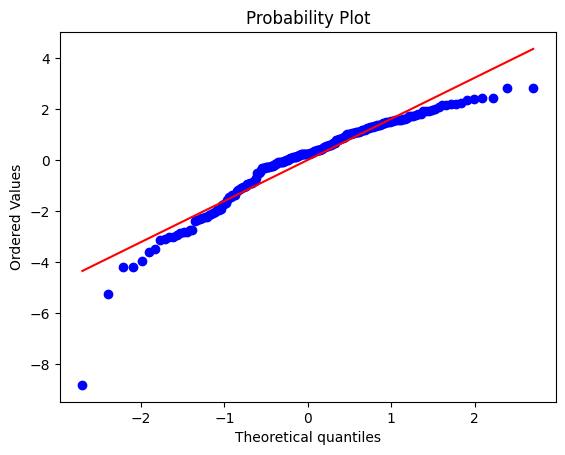

In [ ]:
stats.probplot(residues, dist='norm', plot=plt)
plt.show()

### Residues Homocedasticity analisys

(constant variation residues)

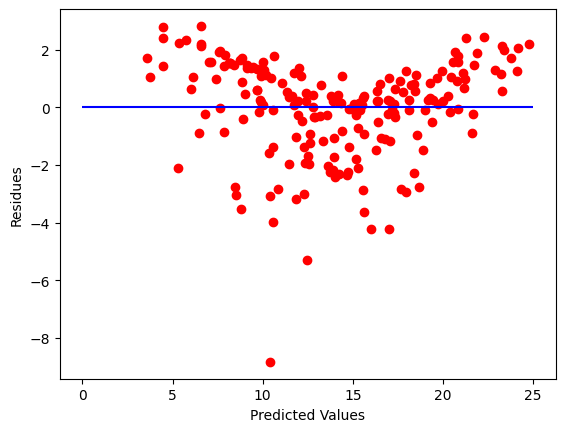

In [ ]:
plt.scatter(y=residues, x=model.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=25, color='blue')
plt.ylabel('Residues')
plt.xlabel('Predicted Values')
plt.show()

### Test Breusch-Pagan (Homocedasticity or heterocedasticity)


Ho = there is homocedasticity: p > 0.05

Ha = there is no homocedasticity: p <= 0.05

In [ ]:
statistics, p, f, fp = sms.het_breuschpagan(model.resid, model.model.exog)

In [ ]:
print('p-values: {}'.format(p))

p-values: 3.938186221574824e-09


### Multicolinearity Absence

Only between independent variables. Attention to values with r > 0.7.

Considered Multicolinearity when values of r > 0.9

In [ ]:
variables_mult_col = df[['TV', 'Radio', 'Jornal']]

In [ ]:
correlations = variables_mult_col.corr(method='pearson')

In [ ]:
correlations

,TV,Radio,Jornal
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Jornal,0.056648,0.354104,1.000000


Using Variation Inflation Factor (VIF)

VIF = 1/(1-R^2)

This value should be < 5

In [ ]:
vif = add_constant(variables)
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const     9.951155
Radio     3.944974
TV        6.521799
Jornal    1.145370
Vendas    9.728633
dtype: float64

In [ ]:
vif

,const,Radio,TV,Jornal,Vendas
0,1.0,37.8,230.1,69.2,22.1
1,1.0,39.3,44.5,45.1,10.4
2,1.0,45.9,17.2,69.3,9.3
3,1.0,41.3,151.5,58.5,18.5
4,1.0,10.8,180.8,58.4,12.9
...,...,...,...,...,...
195,1.0,3.7,38.2,13.8,7.6
196,1.0,4.9,94.2,8.1,9.7
197,1.0,9.3,177.0,6.4,12.8
198,1.0,42.0,283.6,66.2,25.5


### Model Analysis

Model analysis

intercept and coeficient

p_value for each coeficient < 0.05 (statically significative)

Adjusted R-squared (model explanation through data)

statistics p_value F < 0.05 (validate regression model)

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        16:23:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
df['prediction'] = model.fittedvalues

In [ ]:
df.head()

,TV,Radio,Jornal,Vendas,prediction
0,230.1,37.8,69.2,22.1,20.523974
1,44.5,39.3,45.1,10.4,12.337855
2,17.2,45.9,69.3,9.3,12.307671
3,151.5,41.3,58.5,18.5,17.597830
4,180.8,10.8,58.4,12.9,13.188672


**Equation**: Vendas = 2.9 + 0.18 * Radio + 0.04 * TV -0.001 * Jornal